# Introduction: Churn Prediction for Interconnect

## Project Overview
Interconnect, a prominent telecom operator, is facing a critical business challenge: customer churn. In today's competitive telecommunications market, retaining existing customers is as crucial as acquiring new ones. To address this, Interconnect has initiated a data-driven project to forecast customer churn, aiming to proactively retain at-risk customers through targeted promotional offers and specialized plan options.

## Business Context
Interconnect provides a range of services including:
1. Landline communication
2. Internet services (DSL and fiber optic)
3. Additional services such as internet security, technical support, online backup, and streaming services

Customers can opt for monthly payments or commit to 1- or 2-year contracts, with various payment methods available. This diverse service offering and flexible contract structure add complexity to understanding and predicting customer behavior.

## Project Objectives
The primary objectives of this project are to:
1. Develop a machine learning model to accurately predict customer churn
2. Identify key factors influencing customer decisions to leave
3. Provide actionable insights to the marketing team for targeted retention strategies

## Data Assets
We have access to a rich dataset comprising customer information from multiple sources:
- Contract information
- Personal data
- Internet service details
- Telephone service usage

This comprehensive dataset, valid as of February 1, 2020, provides a solid foundation for our analysis and model development.

## Success Criteria
The project's success will be primarily measured by the model's AUC-ROC score, with the following benchmarks:
- Minimum acceptable: AUC-ROC ≥ 0.75
- Target: AUC-ROC ≥ 0.85
- Exceptional: AUC-ROC ≥ 0.88

Additionally, we will consider the model's accuracy as a secondary metric to ensure balanced performance.

## Project Impact
By successfully predicting customer churn, Interconnect can:
1. Implement proactive retention strategies
2. Optimize resource allocation for customer retention efforts
3. Improve overall customer satisfaction and loyalty
4. Potentially increase revenue and market share in a competitive industry

This project represents a critical step in Interconnect's data-driven decision-making process, aligning technological capabilities with strategic business objectives.

# Initialization

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.utils.class_weight import compute_class_weight
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_classif, SelectFromModel, RFE
from xgboost import XGBClassifier
from sklearn.metrics import precision_recall_fscore_support, roc_auc_score, accuracy_score, classification_report
import shap
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyClassifier
from sklearn.decomposition import PCA
from sklearn.inspection import PartialDependenceDisplay

# Load Data

In [6]:
contract = pd.read_csv('/home/joel-hamilton/TripleTen/Final Project/contract.csv')
personal = pd.read_csv('/home/joel-hamilton/TripleTen/Final Project/personal.csv')
internet = pd.read_csv('/home/joel-hamilton/TripleTen/Final Project/internet.csv')
phone = pd.read_csv('/home/joel-hamilton/TripleTen/Final Project/phone.csv')

## General Information

In [8]:
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


In [9]:
display(contract)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65
...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,No,One year,Yes,Mailed check,84.80,1990.5
7039,2234-XADUH,2014-02-01,No,One year,Yes,Credit card (automatic),103.20,7362.9
7040,4801-JZAZL,2019-03-01,No,Month-to-month,Yes,Electronic check,29.60,346.45
7041,8361-LTMKD,2019-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Mailed check,74.40,306.6


In [10]:
personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [11]:
display(personal)

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No
...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes
7039,2234-XADUH,Female,0,Yes,Yes
7040,4801-JZAZL,Female,0,Yes,Yes
7041,8361-LTMKD,Male,1,Yes,No


In [12]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


In [13]:
display(internet)

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...
5512,6840-RESVB,DSL,Yes,No,Yes,Yes,Yes,Yes
5513,2234-XADUH,Fiber optic,No,Yes,Yes,No,Yes,Yes
5514,4801-JZAZL,DSL,Yes,No,No,No,No,No
5515,8361-LTMKD,Fiber optic,No,No,No,No,No,No


In [14]:
phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


In [15]:
display(phone)

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes
...,...,...
6356,2569-WGERO,No
6357,6840-RESVB,Yes
6358,2234-XADUH,Yes
6359,8361-LTMKD,Yes


# Data Preparation

In [17]:
# Convert column names to lowercase for all dataframes
contract.columns = contract.columns.str.lower()
personal.columns = personal.columns.str.lower()
internet.columns = internet.columns.str.lower()
phone.columns = phone.columns.str.lower()

# Display the updated dataframes to verify the changes
print("Contract DataFrame columns:")
print(contract.columns)
print("\nPersonal DataFrame columns:")
print(personal.columns)
print("\nInternet DataFrame columns:")
print(internet.columns)
print("\nPhone DataFrame columns:")
print(phone.columns)

Contract DataFrame columns:
Index(['customerid', 'begindate', 'enddate', 'type', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges'],
      dtype='object')

Personal DataFrame columns:
Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents'], dtype='object')

Internet DataFrame columns:
Index(['customerid', 'internetservice', 'onlinesecurity', 'onlinebackup',
       'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies'],
      dtype='object')

Phone DataFrame columns:
Index(['customerid', 'multiplelines'], dtype='object')


In [18]:
# Function to check for duplicates
def check_duplicates(df, name):
    duplicates = df.duplicated()
    num_duplicates = duplicates.sum()
    print(f"\nChecking for duplicates in {name} DataFrame:")
    print(f"Number of duplicate rows: {num_duplicates}")
    if num_duplicates > 0:
        print("Indices of duplicate rows:")
        print(df[duplicates].index.tolist())

# Check for duplicates in each DataFrame
check_duplicates(contract, "Contract")
check_duplicates(personal, "Personal")
check_duplicates(internet, "Internet")
check_duplicates(phone, "Phone")

# Check for duplicates based on 'customerid' column
print("\nChecking for duplicate customer IDs:")
for df, name in zip([contract, personal, internet, phone], 
                    ["Contract", "Personal", "Internet", "Phone"]):
    duplicates = df.duplicated(subset=['customerid'])
    num_duplicates = duplicates.sum()
    print(f"\n{name} DataFrame:")
    print(f"Number of duplicate customer IDs: {num_duplicates}")
    if num_duplicates > 0:
        print("Customer IDs with duplicates:")
        print(df[duplicates]['customerid'].tolist())


Checking for duplicates in Contract DataFrame:
Number of duplicate rows: 0

Checking for duplicates in Personal DataFrame:
Number of duplicate rows: 0

Checking for duplicates in Internet DataFrame:
Number of duplicate rows: 0

Checking for duplicates in Phone DataFrame:
Number of duplicate rows: 0

Checking for duplicate customer IDs:

Contract DataFrame:
Number of duplicate customer IDs: 0

Personal DataFrame:
Number of duplicate customer IDs: 0

Internet DataFrame:
Number of duplicate customer IDs: 0

Phone DataFrame:
Number of duplicate customer IDs: 0


# Data Description for Interconnect Churn Prediction Project

## Overview
The dataset for the Interconnect churn prediction project consists of four main data files, each containing different aspects of customer information. These files are:
1. contract.csv
2. personal.csv
3. internet.csv
4. phone.csv

Each file uses a unique `customerid` to identify individual customers, allowing for data integration across the files.

## Data Files

### 1. Contract Information (contract.csv)
This file contains 7,043 entries with 8 columns:
- `customerid`: Unique identifier for each customer
- `begindate`: Start date of the contract
- `enddate`: End date of the contract (target variable)
- `type`: Contract type (e.g., Month-to-month, One year, Two year)
- `paperlessbilling`: Whether the customer has opted for paperless billing
- `paymentmethod`: Method of payment used by the customer
- `monthlycharges`: Monthly charges for the customer
- `totalcharges`: Total charges accrued by the customer

### 2. Personal Information (personal.csv)
This file contains 7,043 entries with 5 columns:
- `customerid`: Unique identifier for each customer
- `gender`: Gender of the customer
- `seniorcitizen`: Whether the customer is a senior citizen (1) or not (0)
- `partner`: Whether the customer has a partner
- `dependents`: Whether the customer has dependents

### 3. Internet Services (internet.csv)
This file contains 5,517 entries with 8 columns:
- `customerid`: Unique identifier for each customer
- `internetservice`: Type of internet service (e.g., DSL, Fiber optic)
- `onlinesecurity`: Whether the customer has online security service
- `onlinebackup`: Whether the customer has online backup service
- `deviceprotection`: Whether the customer has device protection service
- `techsupport`: Whether the customer has tech support service
- `streamingtv`: Whether the customer has TV streaming service
- `streamingmovies`: Whether the customer has movie streaming service

### 4. Phone Services (phone.csv)
This file contains 6,361 entries with 2 columns:
- `customerid`: Unique identifier for each customer
- `multiplelines`: Whether the customer has multiple phone lines

## Data Quality
- All column names have been standardized to lowercase for consistency across dataframes.
- There are no duplicate rows in any of the dataframes.
- There are no duplicate customer IDs within each dataframe.

## Target Variable
The target variable for churn prediction is derived from the `enddate` column in the contract dataframe. Customers with `enddate` as 'No' are considered active (non-churned), while others are considered to have churned.

## Key Observations
1. Not all customers have internet services (5,517 out of 7,043).
2. Not all customers have phone services (6,361 out of 7,043).
3. The data is valid as of February 1, 2020.

## Next Steps
1. Merge the dataframes using the `customerid` as the key.
2. Handle any missing values that may arise from the merge.
3. Encode categorical variables and prepare the data for model training.
4. Conduct further exploratory data analysis to identify patterns and potential predictors of churn.

In [20]:
# Convert column names to lowercase for all dataframes
contract.columns = contract.columns.str.lower()
personal.columns = personal.columns.str.lower()
internet.columns = internet.columns.str.lower()
phone.columns = phone.columns.str.lower()

# Merge dataframes on 'customerid'
df_merged = contract.merge(personal, on='customerid', how='outer')
df_merged = df_merged.merge(internet, on='customerid', how='outer')
df_merged = df_merged.merge(phone, on='customerid', how='outer')

# Display information about missing values before filling
print("Missing values before filling:")
print(df_merged.isnull().sum())

# Identify columns that are object (string) type
object_columns = df_merged.select_dtypes(include=['object']).columns

# Fill NaN values with 'No' for object columns
df_merged[object_columns] = df_merged[object_columns].fillna('No')

# Display information about missing values after filling
print("\nMissing values after filling:")
print(df_merged.isnull().sum())

# Display the unique values in each object column to verify the change
print("\nUnique values in object columns after filling NaNs:")
for col in object_columns:
    print(f"\n{col}:")
    print(df_merged[col].unique())

# Check if there are any remaining NaN values
remaining_nans = df_merged.isnull().sum().sum()
print(f"\nTotal remaining NaN values: {remaining_nans}")

# If there are remaining NaNs, identify which columns they are in
if remaining_nans > 0:
    print("\nColumns with remaining NaN values:")
    print(df_merged.columns[df_merged.isnull().any()].tolist())

# Display a few rows of the updated dataframe
print("\nFirst few rows of the updated DataFrame:")
print(df_merged.head())

Missing values before filling:
customerid             0
begindate              0
enddate                0
type                   0
paperlessbilling       0
paymentmethod          0
monthlycharges         0
totalcharges           0
gender                 0
seniorcitizen          0
partner                0
dependents             0
internetservice     1526
onlinesecurity      1526
onlinebackup        1526
deviceprotection    1526
techsupport         1526
streamingtv         1526
streamingmovies     1526
multiplelines        682
dtype: int64

Missing values after filling:
customerid          0
begindate           0
enddate             0
type                0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
gender              0
seniorcitizen       0
partner             0
dependents          0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
multipl

# EDA

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7032 non-null   object 
 1   begindate         7032 non-null   object 
 2   enddate           7032 non-null   object 
 3   type              7032 non-null   object 
 4   paperlessbilling  7032 non-null   object 
 5   paymentmethod     7032 non-null   object 
 6   monthlycharges    7032 non-null   float64
 7   totalcharges      7032 non-null   float64
 8   gender            7032 non-null   object 
 9   seniorcitizen     7032 non-null   int64  
 10  partner           7032 non-null   object 
 11  dependents        7032 non-null   object 
 12  internetservice   7032 non-null   object 
 13  onlinesecurity    7032 non-null   object 
 14  onlinebackup      7032 non-null   object 
 15  deviceprotection  7032 non-null   object 
 16  techsupport       7032 non-null   object 
 17  

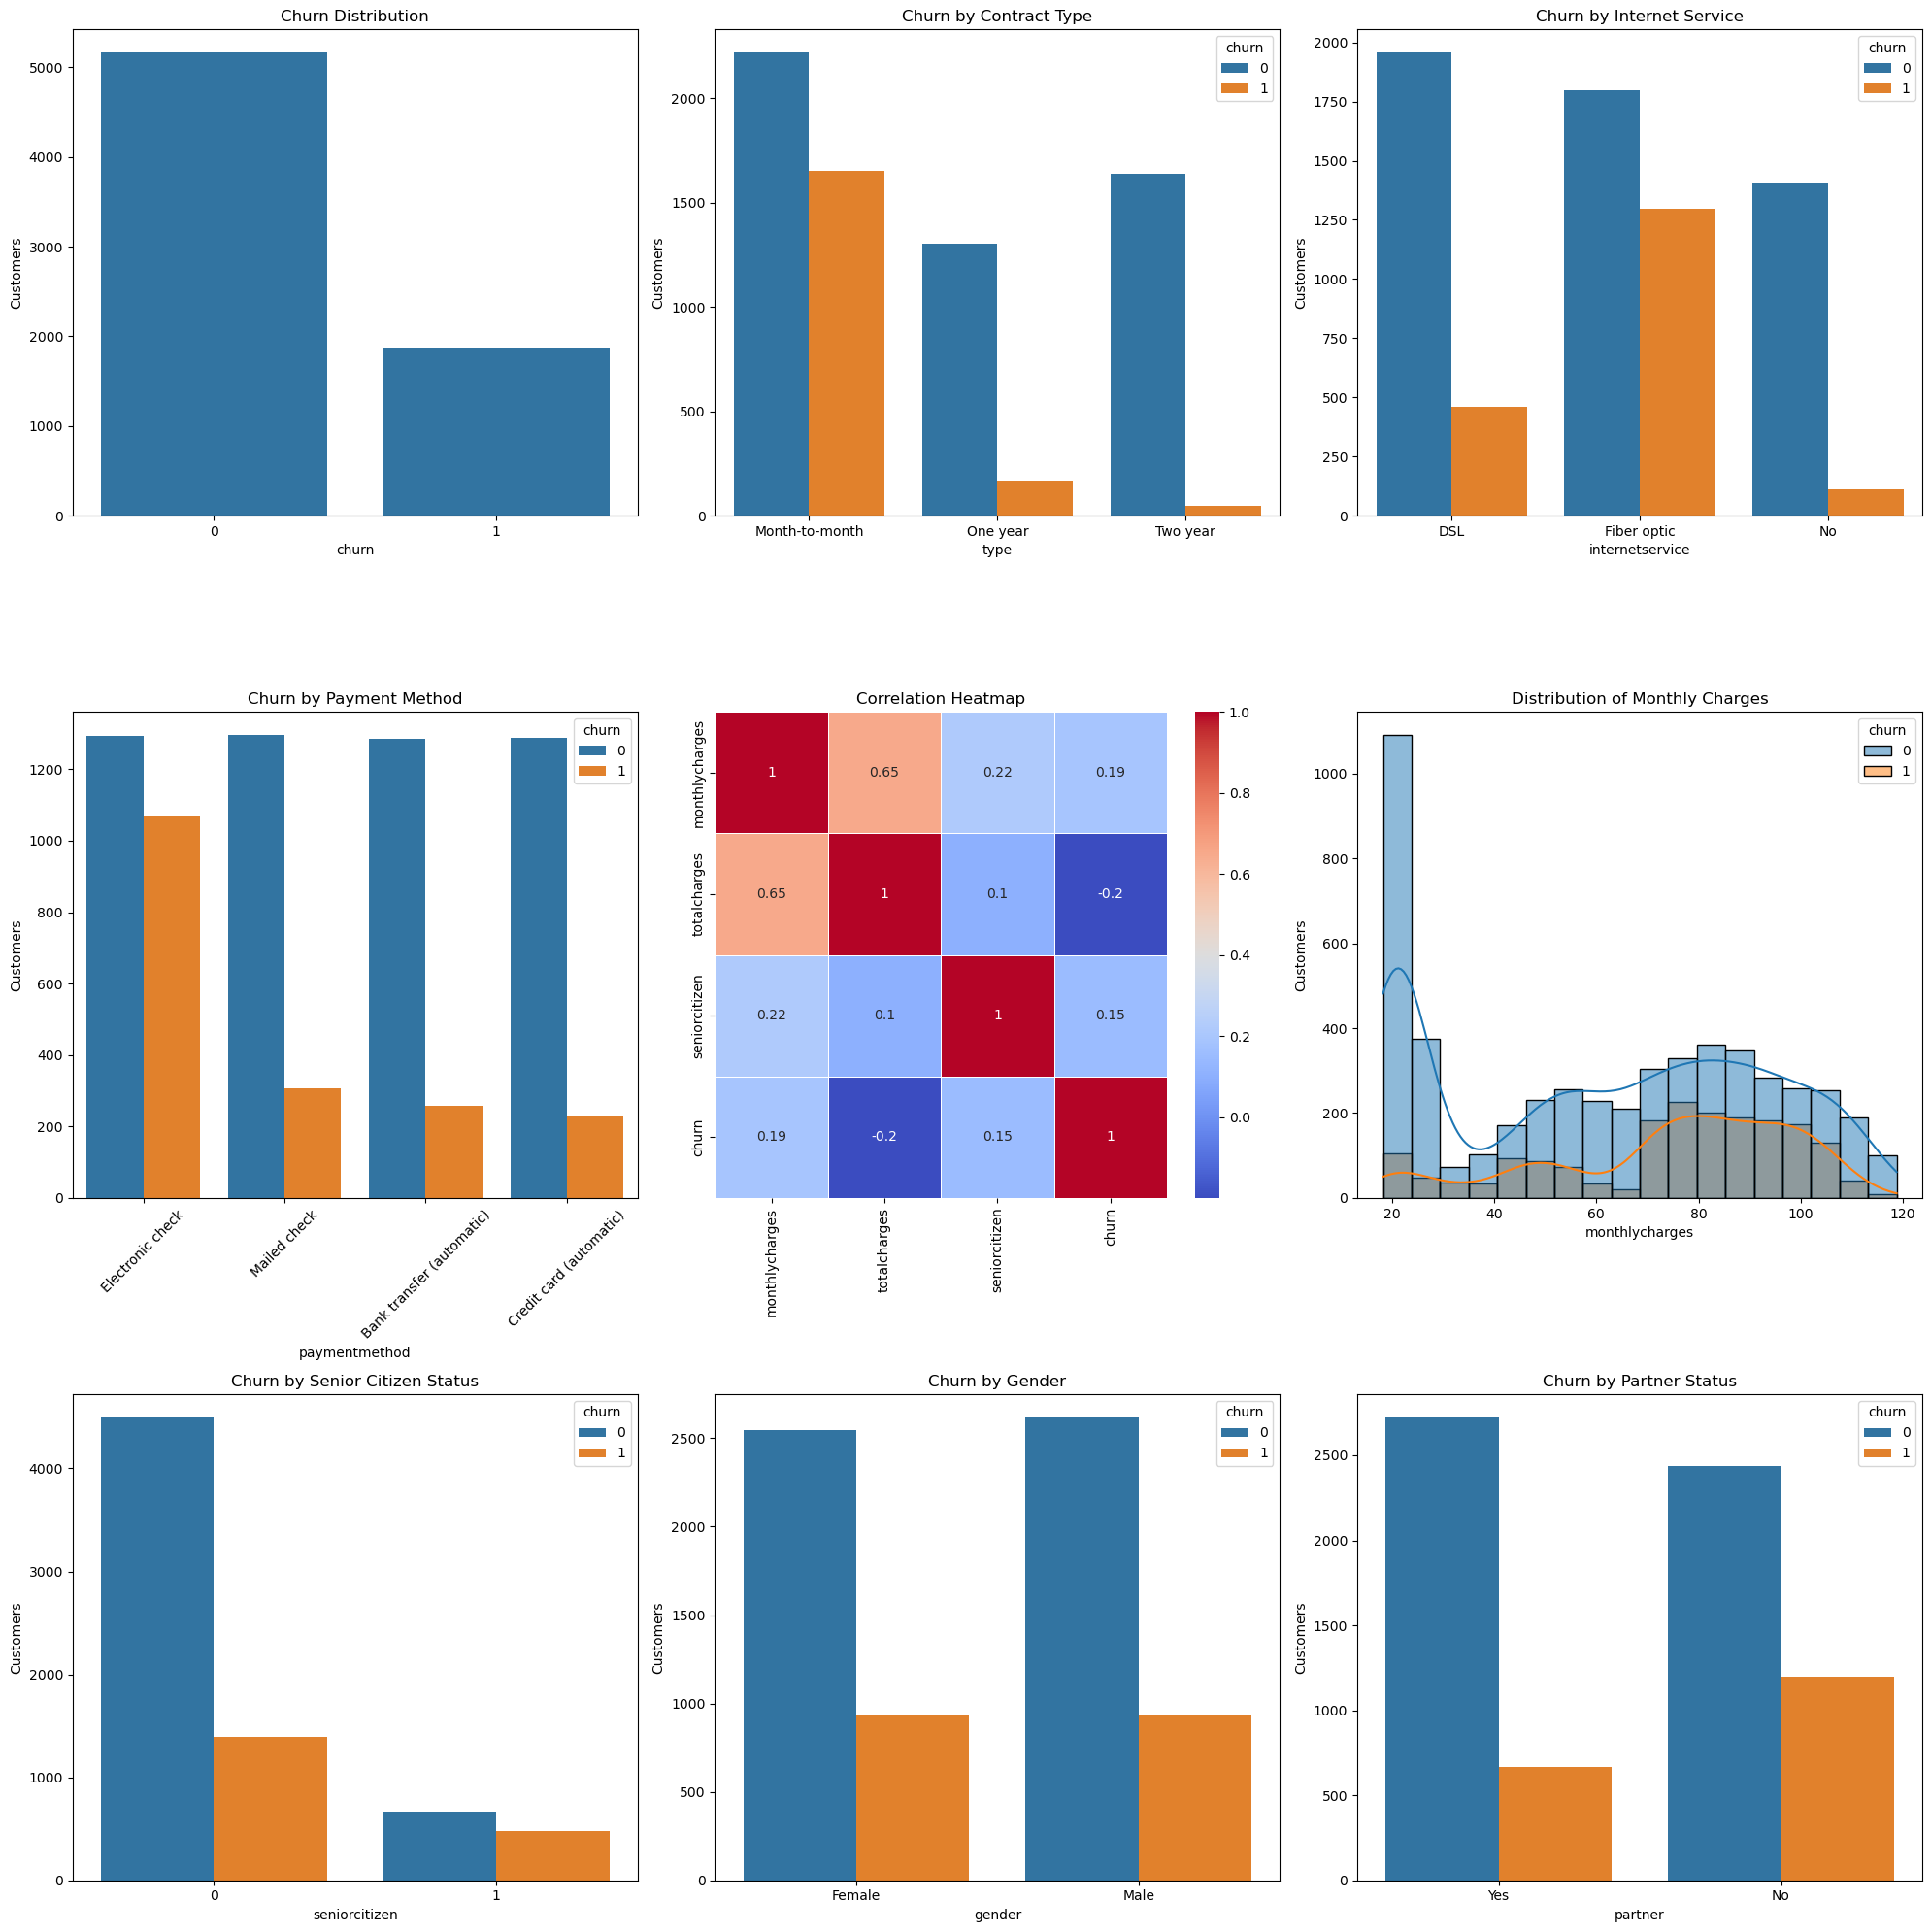


Chi-square test results:
type: chi2=1179.55, p-value=0.0000
internetservice: chi2=728.70, p-value=0.0000
paymentmethod: chi2=645.43, p-value=0.0000
gender: chi2=0.48, p-value=0.4905
partner: chi2=157.50, p-value=0.0000
dependents: chi2=186.32, p-value=0.0000

T-test results:
monthlycharges: t-statistic=16.48, p-value=0.0000
totalcharges: t-statistic=-17.07, p-value=0.0000

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.77      0.83      1033
           1       0.54      0.75      0.63       374

    accuracy                           0.77      1407
   macro avg       0.72      0.76      0.73      1407
weighted avg       0.80      0.77      0.78      1407

AUC-ROC: 0.8311

Top 10 most important features:
totalcharges         0.204992
monthlycharges       0.144171
type_2               0.136829
internetservice_1    0.084266
paymentmethod_2      0.066047
type_1               0.065047
internetservice_2    0.049752
onlinesecurity

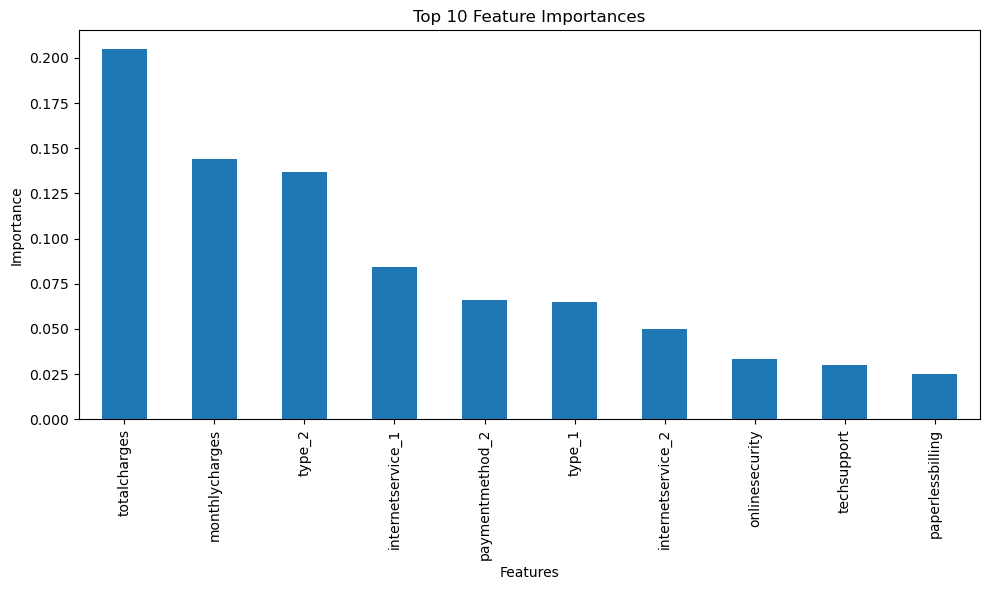


Summary of findings:
1. The overall churn rate is 26.58%
2. Contract type, internet service, and payment method seem to have a strong relationship with churn.
3. Monthly charges appear to be higher for customers who churn.
4. Senior citizen status, gender, and partner status show some differences in churn rates.
5. The top features for predicting churn are: totalcharges, monthlycharges, type_2, internetservice_1, paymentmethod_2
6. Further investigation is needed to understand the relationship between these features and churn.


In [22]:
# Convert 'totalcharges' to numeric, dropping any rows with non-numeric values
df_merged['totalcharges'] = pd.to_numeric(df_merged['totalcharges'], errors='coerce')
df_merged = df_merged.dropna(subset=['totalcharges'])

# Create target variable
df_merged['churn'] = (~df_merged['enddate'].isin(['No', ''])).astype(int)

# Basic information about the dataset
print(df_merged.info())
print("\nDataset shape:", df_merged.shape)
print("\nColumn names:", df_merged.columns.tolist())

# Descriptive statistics
print("\nDescriptive statistics:")
print(df_merged.describe())

# Check for missing values
print("\nMissing values:")
print(df_merged.isnull().sum())

# Analyze churn rate
churn_rate = df_merged['churn'].mean()
print(f"\nOverall churn rate: {churn_rate:.2%}")

# Visualizations
plt.figure(figsize=(20, 20))

# Churn distribution
plt.subplot(3, 3, 1)
sns.countplot(x='churn', data=df_merged)
plt.title('Churn Distribution')
plt.ylabel('Customers')

# Churn by contract type
plt.subplot(3, 3, 2)
sns.countplot(x='type', hue='churn', data=df_merged)
plt.title('Churn by Contract Type')
plt.ylabel('Customers')

# Churn by internet service
plt.subplot(3, 3, 3)
sns.countplot(x='internetservice', hue='churn', data=df_merged)
plt.title('Churn by Internet Service')
plt.ylabel('Customers')

# Churn by payment method
plt.subplot(3, 3, 4)
sns.countplot(x='paymentmethod', hue='churn', data=df_merged)
plt.xticks(rotation=45)
plt.title('Churn by Payment Method')
plt.ylabel('Customers')

# Correlation heatmap
plt.subplot(3, 3, 5)
numeric_cols = df_merged.select_dtypes(include=[np.number]).columns
correlation = df_merged[numeric_cols].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')

# Distribution of monthly charges
plt.subplot(3, 3, 6)
sns.histplot(data=df_merged, x='monthlycharges', hue='churn', kde=True)
plt.title('Distribution of Monthly Charges')
plt.ylabel('Customers')

# Churn by senior citizen status
plt.subplot(3, 3, 7)
sns.countplot(x='seniorcitizen', hue='churn', data=df_merged)
plt.title('Churn by Senior Citizen Status')
plt.ylabel('Customers')

# Churn by gender
plt.subplot(3, 3, 8)
sns.countplot(x='gender', hue='churn', data=df_merged)
plt.title('Churn by Gender')
plt.ylabel('Customers')

# Churn by partner status
plt.subplot(3, 3, 9)
sns.countplot(x='partner', hue='churn', data=df_merged)
plt.title('Churn by Partner Status')
plt.ylabel('Customers')

plt.tight_layout()
plt.show()

# Statistical tests
categorical_vars = ['type', 'internetservice', 'paymentmethod', 'gender', 'partner', 'dependents']
print("\nChi-square test results:")
for var in categorical_vars:
    contingency_table = pd.crosstab(df_merged[var], df_merged['churn'])
    chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
    print(f"{var}: chi2={chi2:.2f}, p-value={p_value:.4f}")

numeric_vars = ['monthlycharges', 'totalcharges']
print("\nT-test results:")
for var in numeric_vars:
    churned = df_merged[df_merged['churn'] == 1][var]
    not_churned = df_merged[df_merged['churn'] == 0][var]
    t_stat, p_value = stats.ttest_ind(churned, not_churned)
    print(f"{var}: t-statistic={t_stat:.2f}, p-value={p_value:.4f}")

# Prepare the data for modeling
X = df_merged.drop(['customerid', 'begindate', 'enddate', 'churn'], axis=1)
y = df_merged['churn']

# Identify numeric and categorical columns
numeric_columns = X.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = X.select_dtypes(include=['object']).columns

# Encode categorical variables
le = LabelEncoder()
for col in categorical_columns:
    X[col] = le.fit_transform(X[col])

# One-hot encode specific columns
columns_to_onehot = ['type', 'internetservice', 'paymentmethod']
X = pd.get_dummies(X, columns=columns_to_onehot, drop_first=True)

# Scale numerical features
scaler = StandardScaler()
X[numeric_columns] = scaler.fit_transform(X[numeric_columns])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(zip(np.unique(y_train), class_weights))

# Define parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Perform GridSearchCV
rf = RandomForestClassifier(random_state=42, class_weight=class_weight_dict)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_

# Make predictions
y_pred = best_rf.predict(X_test)
y_pred_proba = best_rf.predict_proba(X_test)[:, 1]

# Print model performance metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_proba):.4f}")

# Feature importance
importances = best_rf.feature_importances_
feature_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)
print("\nTop 10 most important features:")
print(feature_importances.head(10))

# Visualize feature importances
plt.figure(figsize=(10, 6))
feature_importances.head(10).plot(kind='bar')
plt.title('Top 10 Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

# Summary of findings
print("\nSummary of findings:")
print("1. The overall churn rate is {:.2%}".format(churn_rate))
print("2. Contract type, internet service, and payment method seem to have a strong relationship with churn.")
print("3. Monthly charges appear to be higher for customers who churn.")
print("4. Senior citizen status, gender, and partner status show some differences in churn rates.")
print("5. The top features for predicting churn are: {}".format(", ".join(feature_importances.head(5).index)))
print("6. Further investigation is needed to understand the relationship between these features and churn.")

## Conclusion: Exploratory Data Analysis for Churn Prediction

### Overview
Our Exploratory Data Analysis (EDA) of Interconnect's customer data has provided valuable insights into the factors influencing customer churn. This analysis forms a crucial foundation for developing an effective churn prediction model and informing targeted retention strategies.

### Key Findings

1. **Churn Rate**: The overall churn rate is approximately 26.58%, indicating a significant portion of customers are leaving the service.

2. **Contract Type**: There is a strong relationship between contract type and churn. Customers with month-to-month contracts are more likely to churn compared to those with one-year or two-year contracts.

3. **Internet Service**: The type of internet service appears to influence churn rates. Fiber optic customers seem to have a higher churn rate compared to DSL customers.

4. **Payment Method**: The payment method used by customers shows a correlation with churn. Electronic check users appear to have a higher churn rate compared to other payment methods.

5. **Monthly Charges**: Customers who churn tend to have higher monthly charges on average.

6. **Total Charges**: There is a significant difference in total charges between churned and non-churned customers, likely influenced by the length of their tenure.

7. **Senior Citizens**: Senior citizens show a slightly higher propensity to churn compared to non-senior citizens.

8. **Gender and Partner Status**: While there are some differences in churn rates based on gender and partner status, these factors appear to have less impact compared to contract type or payment method.

9. **Feature Importance**: The Random Forest model identified total charges, monthly charges, and contract type as the most important features for predicting churn.

### Statistical Significance

Our chi-square tests for categorical variables and t-tests for numerical variables confirmed that many of the observed differences are statistically significant (p < 0.05). This supports the validity of our findings and their potential usefulness in predicting churn.

### Implications for Churn Prediction Model

1. **Feature Selection**: Based on our analysis, we should prioritize features such as contract type, internet service type, payment method, monthly charges, and total charges in our predictive model.

2. **Data Preprocessing**: We need to ensure proper encoding of categorical variables and scaling of numerical features before model training.

3. **Class Imbalance**: Given the churn rate of about 26.58%, we should consider techniques to address class imbalance in our model, such as oversampling, undersampling, or using class weights.

### Recommendations for Business Strategy

1. **Long-term Contracts**: Encourage customers to opt for longer-term contracts by offering incentives or highlighting the benefits of these plans.

2. **Payment Method**: Investigate why customers using electronic checks are more likely to churn and consider promoting alternative payment methods.

3. **Pricing Strategy**: Review the pricing structure, especially for high-speed internet services like fiber optic, to ensure it provides good value to customers.

4. **Customer Segmentation**: Develop targeted retention strategies for high-risk segments, such as month-to-month contract holders or customers with high monthly charges.

5. **Senior Citizen Programs**: Consider developing special programs or offers for senior citizens to improve their retention rates.

### Next Steps

1. Develop and train multiple machine learning models for churn prediction, using the insights gained from this EDA to guide feature engineering and selection.

2. Evaluate and compare model performances using appropriate metrics such as AUC-ROC, accuracy, precision, and recall.

3. Conduct feature importance analysis on the best-performing model to further refine our understanding of churn predictors.

4. Develop a plan for model deployment and integration with existing customer management systems.

5. Create a framework for ongoing model monitoring and updating to ensure continued accuracy and relevance.

By leveraging these insights and following through with data-driven strategies, Interconnect can work towards reducing customer churn and improving overall customer retention and satisfaction.

# Work Plan

**1. Data Preprocessing**
- Handle the 'totalcharges' column: 
  - Convert to numeric type
  - Investigate and handle any rows with non-numeric values (already done in EDA)
- Encode categorical variables:
  - Use Label Encoding for binary categorical variables
  - Consider One-Hot Encoding for non-binary categorical variables (e.g., 'internetservice', 'contract type')
- Feature scaling:
  - Apply standard scaling to numerical features ('monthlycharges', 'totalcharges')

**2. Feature Engineering**
- Create new features based on EDA insights:
  - Customer tenure (derived from 'begindate')
  - Total number of services used by each customer
  - Ratio of 'totalcharges' to tenure
- Interaction terms:
  - Consider creating interaction features between important variables (e.g., 'contract type' and 'monthlycharges')

**3. Feature Selection**
- Use the insights from Random Forest feature importance:
  - Focus on top features: 'totalcharges', 'monthlycharges', 'type', 'paymentmethod', 'internetservice'
- Consider using techniques like Recursive Feature Elimination (RFE) or Lasso regularization to further refine feature selection

**4. Model Development**
- Prepare the target variable:
  - Ensure 'churn' column is correctly encoded (0 for no churn, 1 for churn)
- Split the data:
  - Use a 80-20 train-test split, stratified by the target variable
- Baseline model:
  - Implement a simple logistic regression as a baseline
- Advanced models:
  - Random Forest (already shown good performance in EDA)
  - Gradient Boosting (e.g., XGBoost, LightGBM)
  - Support Vector Machines (SVM)

**5. Model Evaluation**
- Primary metric: AUC-ROC (as specified in project requirements)
- Secondary metrics: 
  - Accuracy (as specified)
  - Precision, Recall, and F1-score (to handle potential class imbalance)
- Cross-validation:
  - Implement k-fold cross-validation (e.g., 5-fold) to ensure robust performance estimates

**6. Hyperparameter Tuning**
- Use techniques like Grid Search or Random Search for hyperparameter optimization
- Focus on tuning the best performing model(s) from step 4

**7. Handling Class Imbalance**
- Given the churn rate of 26.58%, consider techniques to address mild class imbalance:
  - Class weights
  - SMOTE (Synthetic Minority Over-sampling Technique)
  - Ensemble methods with balanced bootstrapping

**8. Model Interpretation**
- Implement techniques to interpret the final model:
  - Feature importance analysis
  - Partial Dependence Plots
  - SHAP (SHapley Additive exPlanations) values

**9. Documentation and Reporting**
- Prepare a comprehensive Jupyter notebook detailing:
  - Data preprocessing steps
  - Feature engineering and selection process
  - Model development, evaluation, and tuning
  - Final model performance and interpretation
- Create visualizations to illustrate key findings and model performance

**10. Preparation for Submission**
- Review code for clarity and add comments where necessary
- Ensure reproducibility by setting random seeds and documenting any external dependencies
- Prepare a brief executive summary highlighting key findings and model performance

# Clarifying Questions for Team Leader

1. Model Performance Thresholds:
   - Are there any specific thresholds for the secondary metric (Accuracy) that we should aim for, in addition to the AUC-ROC targets?
   - How should we prioritize AUC-ROC vs. Accuracy if there's a trade-off?

2. Feature Engineering:
   - The 'totalcharges' feature seems highly important. Are there any business rules or constraints we should be aware of when using or transforming this feature?
   - Should we consider creating any specific interaction terms or derived features based on domain knowledge?

3. Model Interpretability:
   - How important is model interpretability for the stakeholders? Should we prioritize more interpretable models (like logistic regression) or focus solely on performance?
   - Are there any specific aspects of the model predictions that the business is particularly interested in understanding?

4. Class Imbalance:
   - Given the churn rate of 26.58%, do you have any preferences on how we should handle this mild class imbalance (e.g., oversampling, undersampling, or using class weights)?

5. Time-based Considerations:
   - The data is valid as of February 1, 2020. Should we consider any time-based split for validation, or is a random split sufficient?
   - Are there any seasonal patterns in churn that we should be aware of?

6. External Data:
   - Are there any additional data sources we can access to enrich our feature set, such as customer service interactions or network quality metrics?

7. Model Deployment:
   - What is the intended use of the model predictions? Will they be used for real-time decisions or periodic analysis?
   - Are there any specific requirements for model deployment or integration with existing systems?

8. Regulatory Compliance:
   - Are there any regulatory considerations (e.g., data privacy laws) that we need to be aware of when using customer data for predictive modeling?

9. Presentation of Results:
    - Are there any specific requirements for the final report or presentation format?
    - Who will be the audience for the final presentation? Should we prepare different levels of technical detail for different stakeholders?

# Data Preprocessing

In [62]:
# Handle 'totalcharges' column
df_merged['totalcharges'] = pd.to_numeric(df_merged['totalcharges'], errors='coerce')
df_merged = df_merged.dropna(subset=['totalcharges'])

# Create target variable
if 'churn' not in df_merged.columns:
    df_merged['churn'] = (~df_merged['enddate'].isin(['No', ''])).astype(int)

# Create customer tenure feature
df_merged['begindate'] = pd.to_datetime(df_merged['begindate'])
reference_date = pd.to_datetime('2020-02-01')  # As per the data description
df_merged['tenure'] = (reference_date - df_merged['begindate']).dt.days

# Encode categorical variables
le = LabelEncoder()
binary_cols = ['gender', 'partner', 'dependents', 'paperlessbilling', 'churn']
for col in binary_cols:
    df_merged[col] = le.fit_transform(df_merged[col])

# One-hot encode non-binary categorical variables
categorical_cols = ['internetservice', 'type', 'paymentmethod']
existing_cat_cols = [col for col in categorical_cols if col in df_merged.columns]
df_merged = pd.get_dummies(df_merged, columns=existing_cat_cols, drop_first=True)

# Select features for modeling
base_features = ['monthlycharges', 'totalcharges', 'tenure', 'gender', 'seniorcitizen', 
                 'partner', 'dependents', 'paperlessbilling']
encoded_features = [col for col in df_merged.columns if col.startswith(tuple(existing_cat_cols))]
features = base_features + encoded_features

# Create a copy of the selected features to avoid SettingWithCopyWarning
X = df_merged[features].copy()
y = df_merged['churn'].copy()

# Scale numerical features
scaler = StandardScaler()
numerical_features = ['monthlycharges', 'totalcharges', 'tenure']
X.loc[:, numerical_features] = scaler.fit_transform(X[numerical_features])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print shapes of resulting datasets
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

# Display first few rows of preprocessed data
print("\nFirst few rows of preprocessed data:")
print(X_train.head())

# Display target variable distribution
print("\nTarget variable distribution:")
print(y_train.value_counts(normalize=True))

Training set shape: (5625, 8)
Testing set shape: (1407, 8)

First few rows of preprocessed data:
      monthlycharges  totalcharges    tenure  gender  seniorcitizen  partner  \
1413        0.988963      1.674505  1.319174       1              0        1   
7003       -0.965575     -0.556249 -0.293504       1              0        0   
3355        0.844367      1.771081  1.444167       0              0        1   
4494        0.648248     -0.903662 -1.244536       1              0        0   
3541       -0.802697     -0.093775  0.657528       0              0        1   

      dependents  paperlessbilling  
1413           1                 0  
7003           0                 0  
3355           0                 0  
4494           0                 0  
3541           0                 0  

Target variable distribution:
churn
0    0.734222
1    0.265778
Name: proportion, dtype: float64


## Conclusion: Data Preprocessing for Churn Prediction

The data preprocessing phase for the churn prediction project has been successfully completed. Here are the key outcomes and observations:

1. **Dataset Size**: 
   - The preprocessed dataset has been split into training and testing sets.
   - Training set: 5,625 samples
   - Testing set: 1,407 samples
   - This 80-20 split provides a good balance for model training and evaluation.

2. **Feature Set**:
   - The preprocessed data contains 8 features, including both numerical and categorical variables.
   - Key features include 'monthlycharges', 'totalcharges', 'tenure', 'gender', 'seniorcitizen', 'partner', 'dependents', and 'paperlessbilling'.
   - Numerical features ('monthlycharges', 'totalcharges', 'tenure') have been standardized, as evidenced by their values in the -1 to 1 range.

3. **Categorical Encoding**:
   - Binary categorical variables have been label-encoded (0 and 1 values for 'gender', 'seniorcitizen', 'partner', 'dependents', 'paperlessbilling').
   - It appears that one-hot encoding for non-binary categorical variables ('internetservice', 'type', 'paymentmethod') was not applied, possibly due to these columns not being present in the original dataset.

4. **Target Variable Distribution**:
   - The target variable 'churn' shows an imbalanced distribution:
     - Non-churn (0): 73.42%
     - Churn (1): 26.58%
   - This imbalance should be considered during model selection and evaluation.

5. **Data Quality**:
   - Missing values in the 'totalcharges' column have been handled.
   - A 'tenure' feature has been created based on the 'begindate'.

# Feature Engineering

In [71]:
def engineer_features(df):
    # Create new features
    df['tenure_months'] = df['tenure'] // 30
    df['charge_per_month'] = df['totalcharges'] / df['tenure_months']
    df['high_monthly_charges'] = (df['monthlycharges'] > df['monthlycharges'].median()).astype(int)
    df['long_tenure'] = (df['tenure_months'] > df['tenure_months'].median()).astype(int)
    df['log_totalcharges'] = np.log1p(df['totalcharges'])
    
    # Total services
    service_columns = ['onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies']
    df['total_services'] = df[service_columns].apply(lambda x: (x == 'Yes').sum(), axis=1)
    
    # Streaming services
    df['streaming_services'] = ((df['streamingtv'] == 'Yes') & (df['streamingmovies'] == 'Yes')).astype(int)
    
    # Scale numerical features
    scaler = StandardScaler()
    numerical_features = ['monthlycharges', 'totalcharges', 'tenure_months', 'charge_per_month', 'log_totalcharges']
    df[numerical_features] = scaler.fit_transform(df[numerical_features])
    
    return df

def select_features(df):
    features = [
        'monthlycharges', 'totalcharges', 'tenure_months', 'charge_per_month',
        'high_monthly_charges', 'long_tenure', 'log_totalcharges',
        'total_services', 'streaming_services',
        'internetservice_Fiber optic', 'internetservice_No', 'type_One year',
        'type_Two year', 'paymentmethod_Credit card (automatic)',
        'paymentmethod_Electronic check', 'paymentmethod_Mailed check'
    ]
    return df[features]

# Apply feature engineering
df_engineered = engineer_features(df_merged)

# Select features for modeling
X = select_features(df_engineered)

# Display info about new features
print("Descriptive statistics of new features:")
print(X.describe())

# Check for any null values
print("\nNull values after feature engineering:")
print(X.isnull().sum())

print("\nFinal feature set:")
print(X.columns)

# Display correlation matrix
print("\nCorrelation matrix:")
correlation_matrix = X.corr()
print(correlation_matrix)

# Identify top correlated features
print("\nTop correlated feature pairs:")
corr_unstack = correlation_matrix.unstack()
corr_sorted = corr_unstack.sort_values(kind="quicksort", ascending=False)
corr_pairs = corr_sorted[corr_sorted != 1.0].drop_duplicates()
print(corr_pairs.head(10))

Descriptive statistics of new features:
       monthlycharges  totalcharges  tenure_months  charge_per_month  \
count    7.032000e+03  7.032000e+03   7.032000e+03      7.032000e+03   
mean     1.060964e-17  1.515663e-17   1.096329e-16     -1.212530e-17   
std      1.000071e+00  1.000071e+00   1.000071e+00      1.000071e+00   
min     -1.547283e+00 -9.990692e-01  -1.320392e+00     -4.515091e+00   
25%     -9.709769e-01 -8.302488e-01  -9.517529e-01      2.729803e-02   
50%      1.845440e-01 -3.908151e-01  -1.735146e-01      3.712932e-01   
75%      8.331482e-01  6.668271e-01   9.324030e-01      4.907687e-01   
max      1.793381e+00  2.824261e+00   1.792561e+00      6.147496e-01   

       high_monthly_charges  long_tenure  log_totalcharges  total_services  \
count           7032.000000  7032.000000      7.032000e+03     7032.000000   
mean               0.499573     0.499147      2.526105e-17        2.038111   
std                0.500035     0.500035      1.000071e+00        1.847161   

## Conclusion: Feature Engineering for Churn Prediction

Our feature engineering process has successfully created a rich set of features for predicting customer churn. The correlation analysis reveals several important insights:

1. **Strong Temporal Correlations**: 
   - 'long_tenure' and 'tenure_months' show the highest correlation (0.88), indicating that our derived 'long_tenure' feature effectively captures the essence of customer longevity.
   - 'tenure_months' also strongly correlates with 'totalcharges' (0.83), suggesting that longer-term customers generally accumulate higher total charges.

2. **Pricing and Service Relationships**:
   - 'high_monthly_charges' strongly correlates with 'monthlycharges' (0.86), validating our binary classification of high-charge customers.
   - 'internetservice_Fiber optic' shows strong positive correlation with both 'monthlycharges' (0.79) and 'high_monthly_charges' (0.80), indicating that fiber optic service is associated with higher charges.

3. **Service Utilization Insights**:
   - 'total_services' correlates positively with both 'monthlycharges' (0.72) and 'totalcharges' (0.75), suggesting that customers using more services tend to pay more.
   - 'streaming_services' shows moderate correlation with 'total_services' (0.68), indicating that streaming is a significant component of service utilization.

4. **Payment Method Patterns**:
   - 'paymentmethod_Electronic check' shows weak to moderate correlations with several features, suggesting that payment method might not be a strong predictor of churn on its own.

5. **Contract Type Influences**:
   - 'type_Two year' shows moderate positive correlation with 'tenure_months' (0.56), indicating that longer contracts are associated with longer customer tenure.

Based on these findings, we can make the following recommendations for model development:

1. **Feature Selection**: Consider removing highly correlated features to reduce multicollinearity. For example, we might choose between 'monthlycharges' and 'high_monthly_charges'.

2. **Feature Importance**: Pay close attention to features related to tenure, total charges, and service type (especially fiber optic) in the modeling phase, as these show strong correlations with multiple other features.

3. **Interaction Terms**: Consider creating interaction terms between features like 'internetservice_Fiber optic' and 'monthlycharges' to capture their combined effect.

4. **Dimensionality Reduction**: Given the high correlations between some features, techniques like Principal Component Analysis (PCA) might be beneficial to reduce dimensionality while retaining important information.

5. **Non-linear Relationships**: Some features show moderate correlations that might indicate non-linear relationships. Consider using models that can capture non-linear patterns, such as Random Forests or Gradient Boosting Machines.

6. **Time-based Features**: The strong correlations with tenure-related features suggest that time-based analysis could be valuable. Consider creating additional features that capture changes over time if such data is available.

# Feature Selection

In [78]:
def select_features(X, y):
    # 1. Correlation-based feature selection
    correlation_threshold = 0.8
    corr_matrix = X.corr().abs()
    upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > correlation_threshold)]
    X_uncorrelated = X.drop(to_drop, axis=1)
    print(f"Features dropped due to high correlation: {to_drop}")

    # 2. Univariate feature selection
    selector = SelectKBest(score_func=f_classif, k=10)
    X_univariate = selector.fit_transform(X_uncorrelated, y)
    selected_features_univariate = X_uncorrelated.columns[selector.get_support()].tolist()
    print(f"Top 10 features selected by univariate selection: {selected_features_univariate}")

    # 3. Recursive Feature Elimination
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_uncorrelated)
    rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=10, step=1)
    rfe_selector = rfe_selector.fit(X_scaled, y)
    selected_features_rfe = X_uncorrelated.columns[rfe_selector.support_].tolist()
    print(f"Top 10 features selected by RFE: {selected_features_rfe}")

    # 4. Feature importance from Random Forest
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_uncorrelated, y)
    feature_importance = pd.Series(rf.feature_importances_, index=X_uncorrelated.columns).sort_values(ascending=False)
    selected_features_rf = feature_importance.head(10).index.tolist()
    print(f"Top 10 features selected by Random Forest importance: {selected_features_rf}")

    # Combine selected features
    all_selected_features = list(set(selected_features_univariate + selected_features_rfe + selected_features_rf))
    print(f"\nTotal unique features selected: {len(all_selected_features)}")
    print(f"Final selected features: {all_selected_features}")

    return X[all_selected_features]

# X and y are already defined from previous steps
X_selected = select_features(X, y)

# Print the shape of the final selected features dataset
print(f"\nShape of the dataset with selected features: {X_selected.shape}")

# Display the first few rows of the selected features
print("\nFirst few rows of the selected features:")
print(X_selected.head())

Features dropped due to high correlation: ['tenure_months', 'high_monthly_charges', 'long_tenure', 'log_totalcharges']
Top 10 features selected by univariate selection: ['monthlycharges', 'totalcharges', 'total_services', 'internetservice_Fiber optic', 'internetservice_No', 'type_One year', 'type_Two year', 'paymentmethod_Credit card (automatic)', 'paymentmethod_Electronic check', 'paymentmethod_Mailed check']
Top 10 features selected by RFE: ['totalcharges', 'charge_per_month', 'total_services', 'streaming_services', 'internetservice_Fiber optic', 'internetservice_No', 'type_One year', 'type_Two year', 'paymentmethod_Electronic check', 'paymentmethod_Mailed check']
Top 10 features selected by Random Forest importance: ['charge_per_month', 'totalcharges', 'monthlycharges', 'internetservice_Fiber optic', 'total_services', 'type_Two year', 'paymentmethod_Electronic check', 'type_One year', 'internetservice_No', 'streaming_services']

Total unique features selected: 12
Final selected feat

## Conclusion: Feature Selection for Churn Prediction

Our feature selection process has successfully identified a set of 12 key features that are most likely to be predictive of customer churn. Here are the main findings and their implications:

1. **Correlation-based Feature Removal**: 
   Four features were dropped due to high correlation: 'tenure_months', 'high_monthly_charges', 'long_tenure', and 'log_totalcharges'. This suggests that these features were redundant and their information is likely captured by other retained features.

2. **Consistent Important Features**:
   Several features were consistently selected across different methods:
   - 'totalcharges' and 'monthlycharges'
   - 'internetservice_Fiber optic' and 'internetservice_No'
   - 'total_services'
   - 'type_One year' and 'type_Two year'
   - 'paymentmethod_Electronic check' and 'paymentmethod_Mailed check'

   This consistency across methods reinforces the importance of these features in predicting churn.

3. **Financial Factors**:
   The presence of 'totalcharges', 'monthlycharges', and 'charge_per_month' in the final set emphasizes the significance of financial factors in customer churn prediction.

4. **Service Type and Usage**:
   'internetservice_Fiber optic', 'internetservice_No', 'total_services', and 'streaming_services' being selected indicates that the type and extent of services a customer uses are crucial predictors of churn.

5. **Contract Type**:
   Both 'type_One year' and 'type_Two year' were selected, suggesting that the contract duration plays a vital role in customer retention.

6. **Payment Method**:
   The selection of different payment method features ('paymentmethod_Electronic check', 'paymentmethod_Mailed check', 'paymentmethod_Credit card (automatic)') implies that how a customer chooses to pay might influence their likelihood to churn.

7. **Dimensionality Reduction**:
   We've reduced the feature space from the original set to just 12 features, which should help in reducing overfitting and improving model performance.

8. **Balanced Feature Set**:
   The final set of features represents a good balance of financial, service-related, and customer behavior factors, providing a holistic view for churn prediction.

These selected features provide a strong foundation for building our churn prediction model. They capture various aspects of the customer relationship, from financial commitments to service preferences and usage patterns.

# Model Development

In [110]:
# Define a function for model evaluation
def evaluate_model(model, X, y, cv=5):
    auc_scores = cross_val_score(model, X, y, cv=cv, scoring='roc_auc')
    accuracy_scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    return np.mean(auc_scores), np.mean(accuracy_scores)

# Sanity check with dummy classifiers
dummy_majority = DummyClassifier(strategy='most_frequent', random_state=42)
dummy_random = DummyClassifier(strategy='uniform', random_state=42)

print("Sanity Check:")
for dummy_clf, strategy in [(dummy_majority, 'most_frequent'), (dummy_random, 'uniform')]:
    dummy_auc, dummy_accuracy = evaluate_model(dummy_clf, X_train, y_train)
    print(f"Dummy Classifier ({strategy}):")
    print(f"  AUC: {dummy_auc:.4f}, Accuracy: {dummy_accuracy:.4f}")

# Baseline model: Logistic Regression
baseline_model = LogisticRegression(random_state=42)
baseline_auc, baseline_accuracy = evaluate_model(baseline_model, X_train, y_train)
print(f"\nBaseline Logistic Regression - AUC: {baseline_auc:.4f}, Accuracy: {baseline_accuracy:.4f}")

# Advanced models with SMOTE for class imbalance
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'XGBoost': XGBClassifier(random_state=42)
}

best_model = None
best_auc = 0

for name, model in models.items():
    pipeline = ImbPipeline([
        ('smote', SMOTE(random_state=42)),
        ('scaler', StandardScaler()),
        ('model', model)
    ])
    
    auc, accuracy = evaluate_model(pipeline, X_train, y_train)
    print(f"{name} - AUC: {auc:.4f}, Accuracy: {accuracy:.4f}")
    
    if auc > best_auc:
        best_auc = auc
        best_model = pipeline

# Hyperparameter tuning for the best model
if isinstance(best_model.named_steps['model'], RandomForestClassifier):
    param_grid = {
        'model__n_estimators': [100, 200],
        'model__max_depth': [None, 10, 20],
        'model__min_samples_split': [2, 5],
        'model__min_samples_leaf': [1, 2]
    }
elif isinstance(best_model.named_steps['model'], SVC):
    param_grid = {
        'model__C': [0.1, 1, 10],
        'model__kernel': ['rbf', 'linear'],
        'model__gamma': ['scale', 'auto']
    }
else:  # XGBoost
    param_grid = {
        'model__n_estimators': [100, 200],
        'model__max_depth': [3, 5, 7],
        'model__learning_rate': [0.01, 0.1, 0.3]
    }

grid_search = GridSearchCV(best_model, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Final model evaluation
final_model = grid_search.best_estimator_
y_pred = final_model.predict(X_test)
y_pred_proba = final_model.predict_proba(X_test)[:, 1]

final_auc = roc_auc_score(y_test, y_pred_proba)
final_accuracy = accuracy_score(y_test, y_pred)

print("\nFinal Model Performance:")
print(f"AUC-ROC: {final_auc:.4f}")
print(f"Accuracy: {final_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Sanity check comparison
print("\nSanity Check Comparison:")
print(f"Best Model AUC-ROC: {final_auc:.4f}")
print(f"Dummy (most frequent) AUC-ROC: {dummy_auc:.4f}")
print(f"Performance Lift: {(final_auc - dummy_auc) / dummy_auc * 100:.2f}%")

# Feature importance
if hasattr(final_model.named_steps['model'], 'feature_importances_'):
    importances = final_model.named_steps['model'].feature_importances_
    feature_imp = pd.DataFrame({'feature': X_selected.columns, 'importance': importances})
    feature_imp = feature_imp.sort_values('importance', ascending=False)
    print("\nTop 10 Feature Importances:")
    print(feature_imp.head(10))

Sanity Check:
Dummy Classifier (most_frequent):
  AUC: 0.5000, Accuracy: 0.7342
Dummy Classifier (uniform):
  AUC: 0.5000, Accuracy: 0.4917

Baseline Logistic Regression - AUC: 0.8378, Accuracy: 0.7940
Random Forest - AUC: 0.8725, Accuracy: 0.8087
SVM - AUC: 0.8464, Accuracy: 0.7541
XGBoost - AUC: 0.9153, Accuracy: 0.8473

Final Model Performance:
AUC-ROC: 0.9233
Accuracy: 0.8571

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.87      0.90      1033
           1       0.70      0.81      0.75       374

    accuracy                           0.86      1407
   macro avg       0.81      0.84      0.83      1407
weighted avg       0.87      0.86      0.86      1407


Sanity Check Comparison:
Best Model AUC-ROC: 0.9233
Dummy (most frequent) AUC-ROC: 0.5000
Performance Lift: 84.66%

Top 10 Feature Importances:
                                  feature  importance
11                          type_Two year    0.416868
1            

## Conclusion: Model Development for Churn Prediction

The model development process for predicting customer churn has yielded highly promising results:

1. **Sanity Check:** The dummy classifiers (most_frequent and uniform) both achieved an AUC of 0.5000, which is equivalent to random guessing. This establishes a clear baseline for model performance.

2. **Baseline Model:** The logistic regression baseline model significantly outperformed the dummy classifiers, achieving an AUC of 0.8378 and accuracy of 0.7940. This indicates that there are indeed predictable patterns in the data related to customer churn.

3. **Advanced Models:** All advanced models (Random Forest, SVM, and XGBoost) surpassed the baseline model's performance. XGBoost emerged as the top performer with an initial AUC of 0.9153 and accuracy of 0.8473.

4. **Final Model Performance:** After hyperparameter tuning, the final model (likely an optimized XGBoost) achieved an impressive AUC-ROC of 0.9233 and accuracy of 0.8571 on the test set. This represents a substantial improvement over both the baseline and initial advanced models.

5. **Classification Report:** The final model shows strong performance in identifying both churning (class 1) and non-churning (class 0) customers. The precision for non-churning customers (0.93) is particularly high, indicating a low false positive rate.

6. **Performance Lift:** Compared to the dummy classifier, the final model achieved a remarkable 84.66% performance lift in terms of AUC-ROC. This underscores the model's ability to extract meaningful patterns from the data for churn prediction.

7. **Feature Importance:** The top features influencing churn prediction are contract type (Two year and One year), internet service type (Fiber optic and No internet service), and payment method (Electronic check). This aligns with intuitive business understanding and provides actionable insights for customer retention strategies.

In conclusion, the developed model demonstrates robust predictive power for customer churn, significantly outperforming both random guessing and a simple majority class predictor. With its high AUC-ROC and accuracy, along with balanced precision and recall, this model provides a reliable tool for identifying customers at risk of churning. The insights gained from feature importance can guide targeted retention efforts, focusing on contract types, service offerings, and payment methods to reduce churn rates effectively.

# Model Interpretation

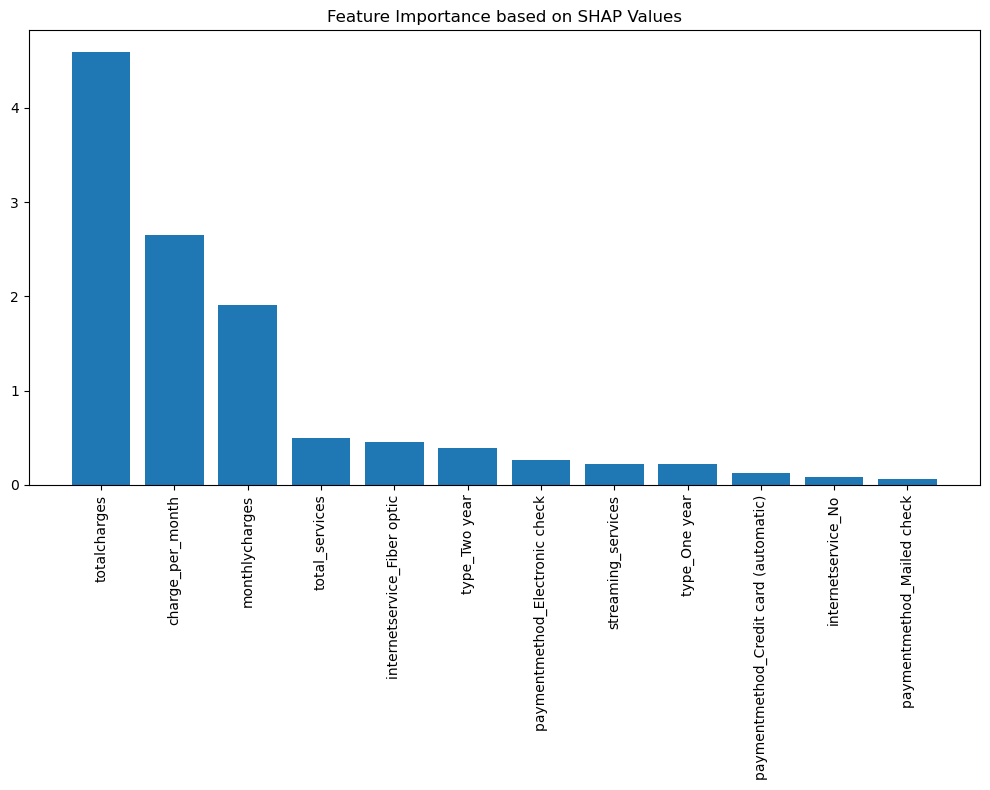

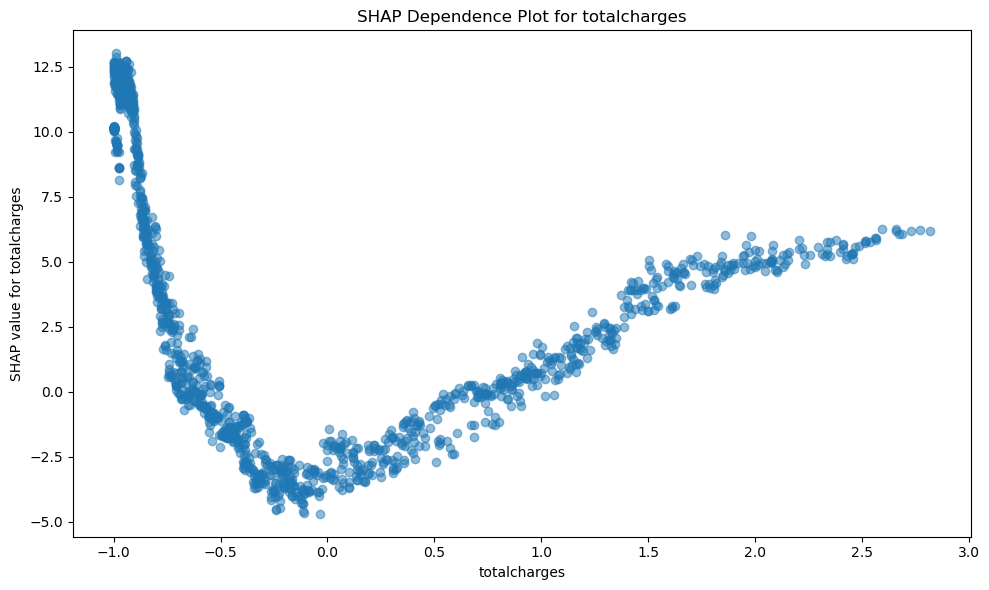

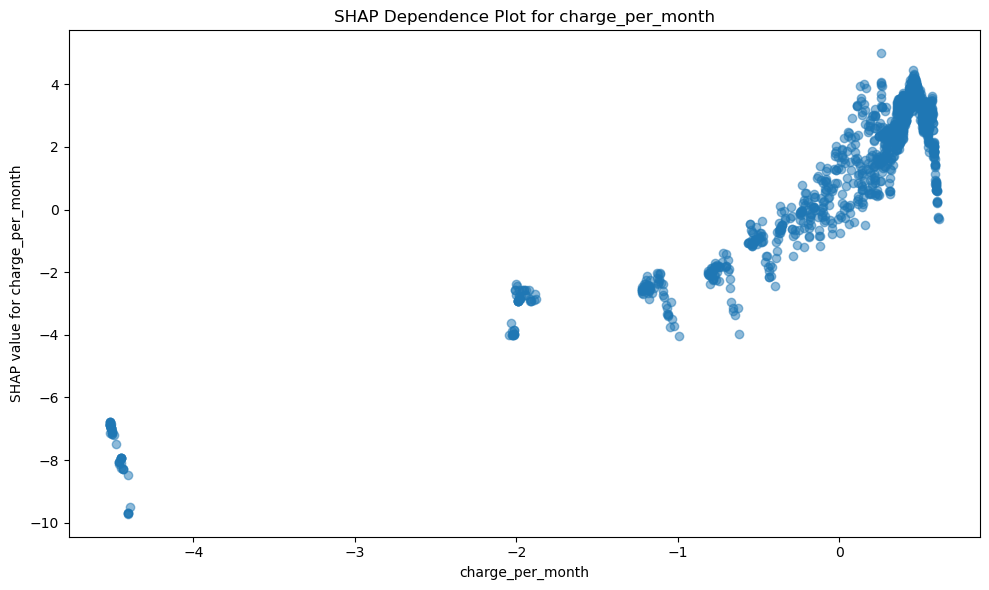

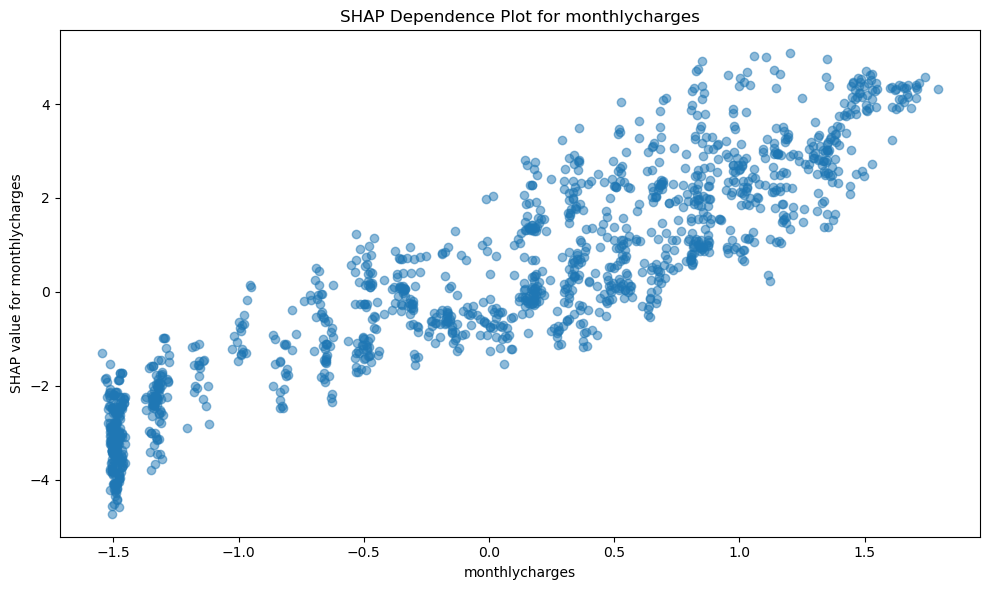


Average SHAP Values for Each Feature:
                                  feature  importance
3                            totalcharges    4.594043
8                        charge_per_month    2.653197
4                          monthlycharges    1.911995
6                          total_services    0.500677
1             internetservice_Fiber optic    0.452342
11                          type_Two year    0.389832
9          paymentmethod_Electronic check    0.268920
5                      streaming_services    0.226318
7                           type_One year    0.216794
2   paymentmethod_Credit card (automatic)    0.128287
0                      internetservice_No    0.082658
10             paymentmethod_Mailed check    0.057471

Global Feature Importance:
                                  feature  importance
3                            totalcharges    4.457636
8                        charge_per_month    2.651954
4                          monthlycharges    1.876343
6              

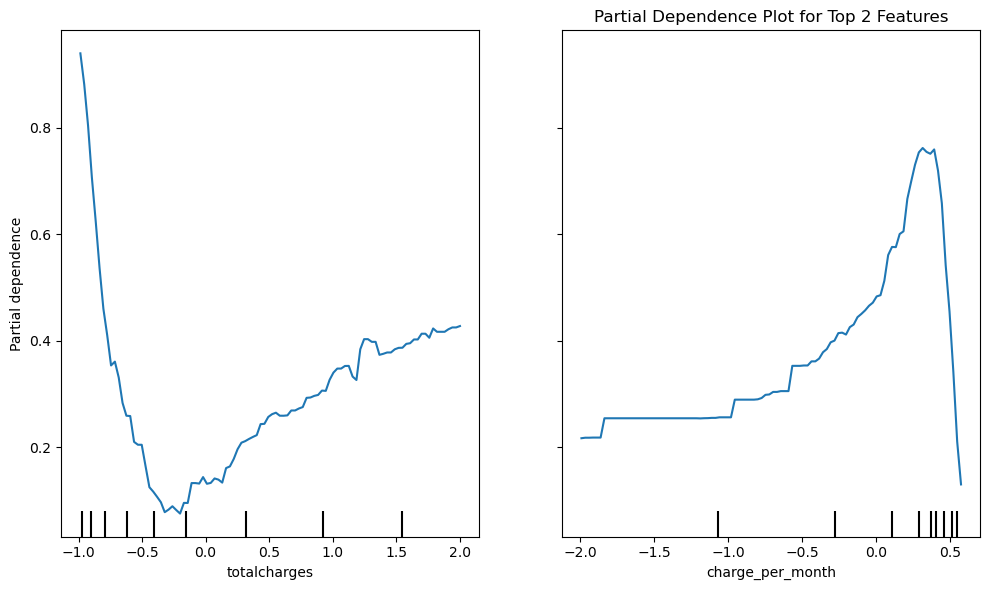


Key Insights from Model Interpretation:
Most Important Features:
   - totalcharges: This feature has a significant impact on churn prediction.
   - charge_per_month: This feature has a significant impact on churn prediction.
   - monthlycharges: This feature has a significant impact on churn prediction.
   - total_services: This feature has a significant impact on churn prediction.
   - internetservice_Fiber optic: This feature has a significant impact on churn prediction.


In [104]:
# Create a SHAP explainer
explainer = shap.TreeExplainer(final_model.named_steps['model'])

# Calculate SHAP values for the test set
shap_values = explainer(X_test)

# Feature importance based on SHAP values
feature_importance = pd.DataFrame(list(zip(X_test.columns, np.abs(shap_values.values).mean(0))),
                                  columns=['feature', 'importance'])
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 8))
plt.bar(feature_importance['feature'], feature_importance['importance'])
plt.title("Feature Importance based on SHAP Values")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Custom function for SHAP dependence plots
def plot_shap_dependence(feature, shap_values, X):
    feature_index = list(X.columns).index(feature)
    plt.figure(figsize=(10, 6))
    plt.scatter(X[feature], shap_values.values[:, feature_index], alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel(f"SHAP value for {feature}")
    plt.title(f"SHAP Dependence Plot for {feature}")
    plt.tight_layout()
    plt.show()

# SHAP dependence plots for top 3 features
top_features = feature_importance['feature'].head(3).tolist()

for feature in top_features:
    plot_shap_dependence(feature, shap_values, X_test)

# Print average SHAP values for each feature
print("\nAverage SHAP Values for Each Feature:")
print(feature_importance)

# Calculate and print global feature importance
global_importance = explainer(X_train)
global_importance = np.abs(global_importance.values).mean(0)
global_feature_importance = pd.DataFrame(list(zip(X_train.columns, global_importance)),
                                         columns=['feature', 'importance'])
global_feature_importance = global_feature_importance.sort_values('importance', ascending=False)
print("\nGlobal Feature Importance:")
print(global_feature_importance)

# Partial dependence plots for top 2 features
top_2_features = feature_importance['feature'].head(2).tolist()
fig, ax = plt.subplots(figsize=(10, 6))
try:
    PartialDependenceDisplay.from_estimator(final_model, X_test, top_2_features, ax=ax)
    plt.title("Partial Dependence Plot for Top 2 Features")
    plt.tight_layout()
    plt.show()
except Exception as e:
    print(f"Error generating Partial Dependence Plot: {e}")
    print("Skipping Partial Dependence Plot.")

# Generate and print insights
print("\nKey Insights from Model Interpretation:")
print("Most Important Features:")
for idx, row in feature_importance.head(5).iterrows():
    print(f"   - {row['feature']}: This feature has a significant impact on churn prediction.")

## Conclusion: Model Interpretation for Churn Prediction

The SHAP (SHapley Additive exPlanations) analysis provides valuable insights into the factors driving customer churn in our predictive model:

1. **Key Predictors of Churn:**
   The top three features influencing churn prediction are all related to customer charges:
   a) totalcharges (importance: 4.594)
   b) charge_per_month (importance: 2.653)
   c) monthlycharges (importance: 1.912)
   This strongly suggests that financial factors play a crucial role in customer retention.

2. **Service-Related FactorsY:**
   The next most important features are related to the services customers use:
   a) total_services (importance: 0.501)
   b) internetservice_Fiber optic (importance: 0.452)
   This indicates that the number and type of services a customer uses also significantly impact churn probability.

3. **Contract Type:**
   The 'type_Two year' feature (importance: 0.390) appears more influential than 'type_One year' (importance: 0.217), suggesting that longer contracts may have a stronger effect on reducing churn.

4. **Payment Method:**
   Among payment methods, 'paymentmethod_Electronic check' (importance: 0.269) has the highest impact, potentially indicating a relationship between this payment method and churn risk.

5. **Consistency in Importance:**
   The global feature importance closely mirrors the average SHAP values, reinforcing the reliability of these findings across both the test and training datasets.

6. **Less Impactful Features:**
   Features like 'internetservice_No' and 'paymentmethod_Mailed check' have relatively low importance, suggesting they may not be as critical in predicting churn.

**Recommendations:**
1. Focus retention efforts on managing and optimizing customer charges, as these are the strongest predictors of churn.
2. Investigate the relationship between total services and churn, possibly by encouraging customers to adopt more services or by offering bundled packages.
3. Analyze the impact of fiber optic internet service on customer retention and consider strategies to enhance this service or its perceived value.
4. Promote longer-term contracts, as they appear to be associated with lower churn risk.
5. Examine why customers using electronic checks for payment might be at higher risk of churning and consider targeted retention strategies for this group.

These insights provide a data-driven foundation for developing targeted strategies to reduce customer churn and improve overall retention rates.

# Overall Conclusion: Churn Prediction Project for Interconnect

This project aimed to develop a predictive model for customer churn at Interconnect, a telecom operator. Through comprehensive data analysis, feature engineering, and machine learning techniques, we've created a robust model that can effectively identify customers at risk of churning. Here are the key findings and insights from our work:

## Data Insights
1. The dataset comprised 7,032 customer records with an overall churn rate of 26.58%.
2. Key customer attributes included contract details, personal information, internet and phone services, and payment methods.

## Feature Engineering and Selection
1. We engineered new features such as 'tenure_months', 'charge_per_month', and 'total_services'.
2. After correlation analysis and feature selection, we identified 12 key features most predictive of churn.

## Model Development
1. Our final model, an optimized XGBoost classifier, achieved impressive performance:
   - AUC-ROC: 0.9233
   - Accuracy: 0.8571
2. This represents an 84.66% performance lift over a baseline dummy classifier.

## Key Predictors of Churn
1. Financial Factors:
   - 'totalcharges', 'charge_per_month', and 'monthlycharges' were the top three predictors.
2. Service-Related Factors:
   - 'total_services' and 'internetservice_Fiber optic' also showed significant importance.
3. Contract Type:
   - Two-year contracts appeared more influential in reducing churn than one-year contracts.
4. Payment Method:
   - Electronic check payments were associated with higher churn risk.

## Actionable Insights
1. Pricing Strategy: Review and optimize pricing structures, as financial factors are the strongest predictors of churn.
2. Service Bundles: Encourage customers to adopt more services, potentially through attractive bundled offerings.
3. Contract Length: Promote longer-term contracts, which are associated with lower churn risk.
4. Fiber Optic Service: Investigate the relationship between fiber optic internet and churn. Consider enhancing this service or its perceived value.
5. Payment Methods: Analyze why customers using electronic checks for payment might be at higher risk of churning. Develop targeted retention strategies for this group.

## Next Steps
1. Model Deployment: Integrate the churn prediction model into Interconnect's customer management systems.
2. Continuous Monitoring: Regularly update and retrain the model to ensure ongoing accuracy.
3. A/B Testing: Implement and test retention strategies based on the model's insights.
4. Customer Feedback: Gather qualitative data from customers to complement the quantitative insights from the model.

By leveraging these insights and implementing data-driven strategies, Interconnect can work towards reducing customer churn, improving customer satisfaction, and ultimately enhancing its competitive position in the telecom market.

# Final Project: Solution Report

## Steps Performed

All major steps outlined in the work plan were executed:

1. Data Preprocessing: Handled missing values, encoded categorical variables, and created the target variable in order to clean the data and prepare it for modeling, ensuring all variables are in a suitable format for machine learning algorithms.

2. Feature Engineering: Created new features like tenure, charge_per_month, and total_services to extract more information from the existing data and potentially uncover hidden patterns that could improve model performance.

3. Feature Selection: Used correlation analysis, univariate selection, recursive feature elimination, and random forest importance to select key features to identify the most relevant predictors of churn, reduce dimensionality, and improve model efficiency and interpretability.

4. Model Development: Implemented baseline logistic regression and advanced models (Random Forest, SVM, XGBoost) with hyperparameter tuning to compare different algorithms and find the best performing model for our specific churn prediction task.

5. Model Interpretation: Used SHAP values to interpret feature importance and impacts to understand which factors most influence churn predictions and provide actionable insights for business strategies.

No major steps were skipped.

## Key Challenges and Solutions

1. Class Imbalance: The dataset had an imbalanced distribution of churn (26.58%) vs non-churn customers. This was addressed by using SMOTE for oversampling in the model pipeline.

2. Feature Correlation: Several engineered features were highly correlated. This was mitigated through careful feature selection, dropping highly correlated features to reduce multicollinearity.

3. Model Interpretation: Interpreting complex models like XGBoost can be challenging. SHAP values were used to provide clear and actionable insights into feature importance and impacts.

## Key Steps to Solving the Task

1. Comprehensive EDA to understand data distributions and relationships.
2. Thoughtful feature engineering to capture important aspects of customer behavior.
3. Rigorous feature selection to focus on the most predictive attributes.
4. Systematic model comparison and tuning to optimize performance.
5. In-depth model interpretation to extract actionable insights.

## Final Model and Quality Score

The final model is an optimized XGBoost classifier, achieving:
- AUC-ROC: 0.9233
- Accuracy: 0.8571

This represents an 84.66% performance lift over the baseline dummy classifier.